In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [430]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [431]:
data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [433]:
data.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


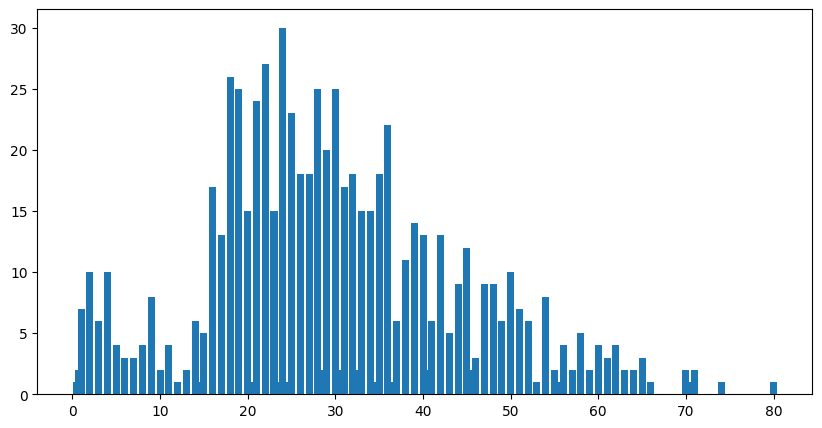

In [434]:
plt.figure(figsize = (10, 5))
plt.bar(data['Age'].value_counts().index, data['Age'].value_counts().values)
plt.show()

In [435]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

In [436]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [437]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [438]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [439]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True).astype(int)
data['Pclass_Fare'] = data['Pclass'] * data['Fare']

In [440]:
data['Embarked_Q'] = data['Embarked_Q'].astype(int)
data['Embarked_S'] = data['Embarked_S'].astype(int)

In [441]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_Fare
0,0,3,1,22.0,1,0,7.2500,0,1,21.7500
1,1,1,0,38.0,1,0,71.2833,0,0,71.2833
2,1,3,0,26.0,0,0,7.9250,0,1,23.7750
3,1,1,0,35.0,1,0,53.1000,0,1,53.1000
4,0,3,1,35.0,0,0,8.0500,0,1,24.1500


In [442]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['Age', 'Fare']] = sc.fit_transform(data[['Age', 'Fare']])

In [443]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_Fare
0,0,3,1,-0.533834,1,0,-0.502445,0,1,21.7500
1,1,1,0,0.674891,1,0,0.786845,0,0,71.2833
2,1,3,0,-0.231653,0,0,-0.488854,0,1,23.7750
3,1,1,0,0.448255,1,0,0.420730,0,1,53.1000
4,0,3,1,0.448255,0,0,-0.486337,0,1,24.1500


In [444]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [445]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       105
           1       0.76      0.80      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [447]:
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty,
    C=C,
    class_weight=class_weight,
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    cv=10
)

lr_cv.fit(X_train_smote, y_train_smote)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr = LogisticRegression(**best_params)
lr.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.8, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.8, class_weight={0: 0.5, 1: 0.5}, solver='liblinear')

In [448]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = lr.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[86 19]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

